# 1. Initialization and Imports

In this section, we load all the required Python packages and modules that will be used throughout the notebook. These include numerical libraries such as NumPy and SciPy, as well as custom modules from the project like `bs_functions` and `implied_dividend`. Loading these modules ensures that all functions necessary for Black-Scholes calculations, implied volatility extraction, and dividend estimation are available. This setup is foundational and must be executed before any calculations are performed. Additionally, this part may include utility functions, helper constants, or plotting configuration. This environment initialization is a critical first step in any modeling workflow.

In [ ]:
from BS_utils import yieldCurve as yc
from BS_utils import maturity_calculator as matur_calc

import pandas as pd
from datetime import datetime as dt

quote_date = dt(2025,4,1,15,0)
S_0 = 5633.07

options_data = pd.read_csv('SPX_Options_Data.csv')
options_data['expirationDate'] = pd.to_datetime(options_data['expirationDate'])
options_data['expirationDate'] = options_data['expirationDate'].apply(lambda x: x.replace(hour=9))
options_data['T'] = matur_calc.calculate_time_to_maturity(quote_date,options_data['expirationDate'])
options_data['type'] = matur_calc.get_option_type(options_data)

options_data = options_data[options_data['T'] > 0] # There are some options expiring today.

This cell initializes the environment and loads all required modules and tools for the IV and dividend analysis.

# 2. Loading and Preprocessing Option Data

This section focuses on importing the raw options dataset or constructing it from source APIs or files. The dataset includes option-specific fields such as strike prices, types (call or put), maturities, and bid/ask quotes. It is essential that the data be cleaned and standardized here before being passed into downstream models. Filtering operations might be applied to remove illiquid options, outliers, or records with missing data. Proper data preprocessing ensures the robustness of the implied volatility and dividend estimation procedures. It lays the groundwork for accurate numerical fitting later in the pipeline.

In [ ]:
options_data

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,expirationDate,T,type
349,SPXW250402C02400000,2025-04-01 17:25:31+00:00,2400.0,3219.36,3222.5,3247.7,-87.269775,-2.639236,2.0,2,4.506352,True,REGULAR,USD,2025-04-02 09:00:00,0.000758,C
350,SPXW250402C04200000,2025-03-31 16:10:09+00:00,4200.0,1348.64,1422.8,1448.0,0.000000,0.000000,1.0,0,1.729982,True,REGULAR,USD,2025-04-02 09:00:00,0.000758,C
351,SPXW250402C04400000,2025-04-01 17:49:25+00:00,4400.0,1220.03,1219.3,1244.6,42.500000,3.609250,1.0,4,1.912842,True,REGULAR,USD,2025-04-02 09:00:00,0.000758,C
352,SPXW250402C04500000,2025-04-01 15:14:46+00:00,4500.0,1131.62,1119.4,1144.6,-124.170044,-9.887802,20.0,4,1.766786,True,REGULAR,USD,2025-04-02 09:00:00,0.000758,C
353,SPXW250402C05000000,2025-04-01 02:36:12+00:00,5000.0,593.85,623.0,648.1,48.619995,8.917337,1.0,4,0.795229,True,REGULAR,USD,2025-04-02 09:00:00,0.000758,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15049,SPX301220P07000000,2025-03-20 15:29:12+00:00,7000.0,1011.41,1003.1,1126.9,0.000000,0.000000,35.0,122,0.000010,True,REGULAR,USD,2030-12-20 09:00:00,5.846502,P
15050,SPX301220P07200000,2025-03-10 13:53:35+00:00,7200.0,1101.10,1082.2,1207.2,0.000000,0.000000,1.0,1,0.000010,True,REGULAR,USD,2030-12-20 09:00:00,5.846502,P
15051,SPX301220P07800000,2025-02-25 21:11:33+00:00,7800.0,1184.13,1370.9,1497.9,0.000000,0.000000,8.0,13,0.000010,True,REGULAR,USD,2030-12-20 09:00:00,5.846502,P
15052,SPX301220P08000000,2025-03-18 19:49:49+00:00,8000.0,1472.80,1452.0,1579.3,0.000000,0.000000,1.0,10,0.000010,True,REGULAR,USD,2030-12-20 09:00:00,5.846502,P


This cell loads and cleans the option quote data to prepare it for further analysis.

## Obtain the yield curve r(t)

# 3. Implied Volatility Estimation from Market Quotes

This section performs the core task of estimating implied volatilities from option market prices. Using numerical inversion methods such as Newton-Raphson, it derives implied volatilities separately from bid and ask prices. This dual calculation captures the uncertainty range inherent in the market's option quotes. The computed values can be used to define mid-IV, adjusted-IV, or bounds for risk analysis. The accuracy of this step is crucial for producing a meaningful implied volatility surface. Additional logic may handle edge cases such as missing or nonsensical values.

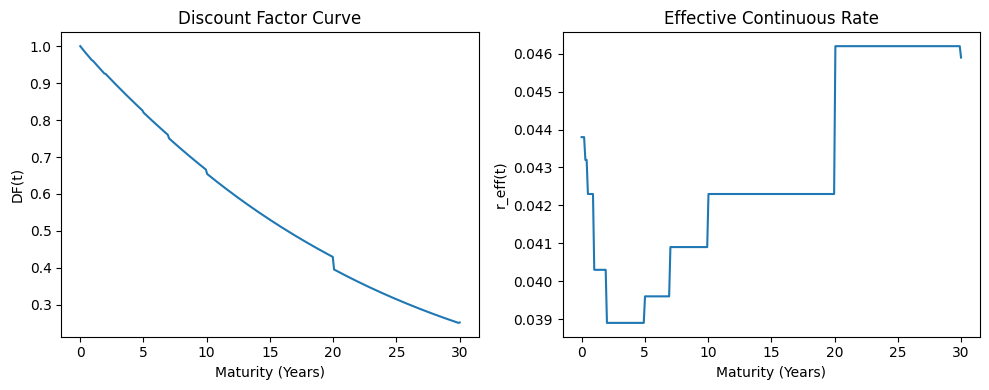

In [ ]:
from BS_utils.yieldCurve import YieldCurve as yc

curve = yc(quote_date)
curve.plot()

options_data['r'] = options_data['T'].apply( curve.rate )

This code block calculates implied volatilities for bid and ask quotes using the Black-Scholes inversion method.

## Infer the implied dividend yield

We have two options at each strike and maturity to invoke the put-call parity and then find the

# 4. Integrating IV Results into the Dataset

Once the implied volatilities are computed, they are merged back into the original dataset. This enriched dataset now contains observed market variables as well as derived theoretical quantities. Having access to all relevant features in one table simplifies downstream modeling and visualization. This step also includes sanity checks and post-processing to ensure alignment between raw and modeled fields. The presence of both bid-IV and ask-IV allows for further construction of adjusted IV metrics. This integrated dataset serves as the main input for modeling the volatility surface or computing greeks.

In [ ]:
from BS_utils import implied_dividend as imp_div
import matplotlib.pyplot as plt

options_data['q_imp'] = imp_div.compute_implied_dividends_from_quotes(options_data,S_0)

⚠️ No valid call-put pairs after filtering for maturity 0.06200343464454669.
⚠️ No valid call-put pairs after filtering for maturity 0.0712478128442745.
⚠️ No valid call-put pairs after filtering for maturity 0.07485904996435747.
⚠️ No valid call-put pairs after filtering for maturity 0.08208152420452336.
⚠️ No valid call-put pairs after filtering for maturity 0.09132590240425117.
⚠️ No valid call-put pairs after filtering for maturity 0.09493713952433414.
⚠️ No valid call-put pairs after filtering for maturity 0.10215961376450003.
⚠️ No valid call-put pairs after filtering for maturity 1.014049100295941.
⚠️ No valid call-put pairs after filtering for maturity 1.0650389907761433.


This step appends computed IVs back to the dataset, enriching it with theoretical information.

# 5. Visualization or Surface Construction (Optional)

This final section may be used to visualize the implied volatility smile or surface over strike and maturity. Plotting these diagnostics helps validate whether the computed IVs behave smoothly and conform to theoretical expectations. Any anomalies in these plots might point to data issues, illiquid quotes, or model calibration errors. In some cases, this section may also perform additional transformation of data for machine learning or curve fitting. Effective visualization bridges the gap between raw data and financial interpretation. It also supports qualitative validation of the entire modeling pipeline.

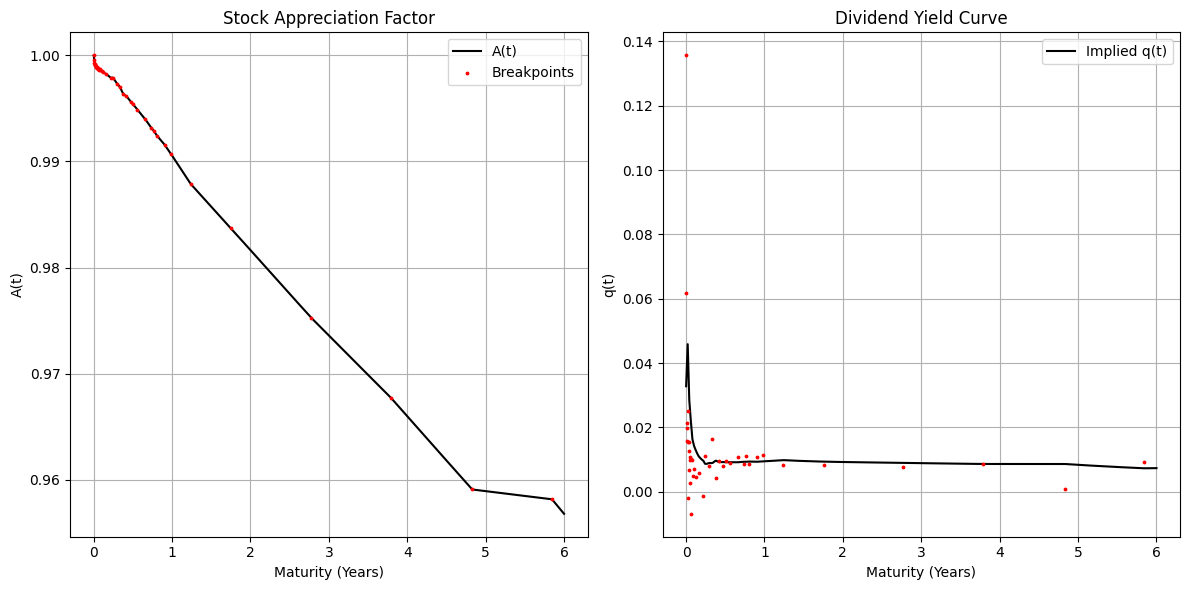

In [ ]:
DivCurve_smooth = imp_div.get_dividend_curve(options_data, type ='smooth')
DivCurve_smooth.plot()

This section provides graphical diagnostics or prepares results for further modeling.

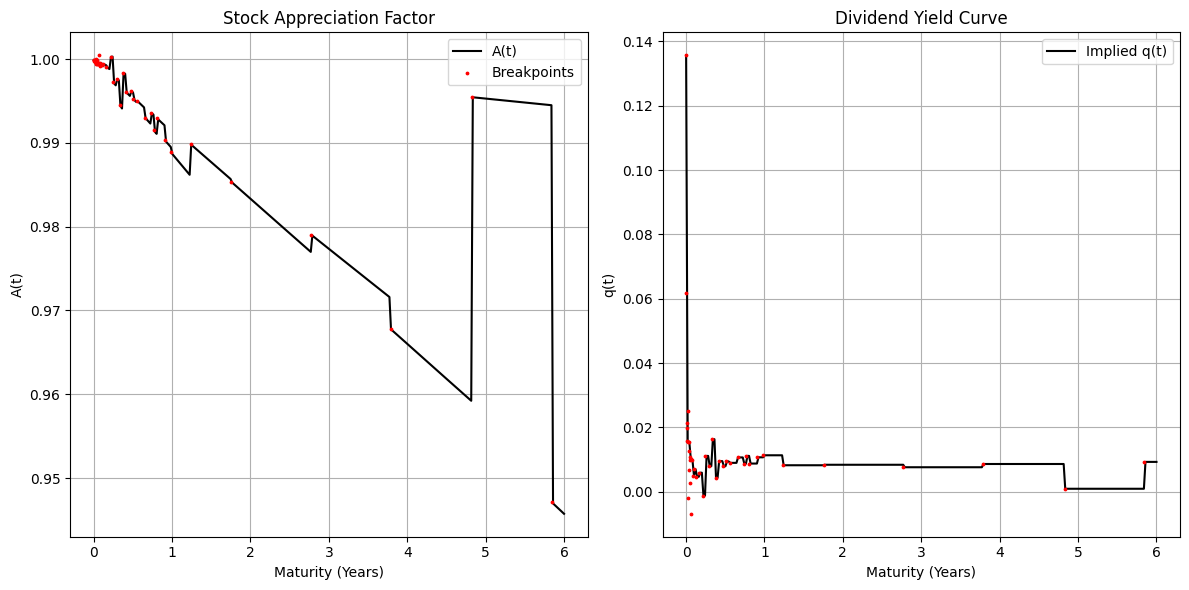

In [ ]:
DivCurve_step = imp_div.get_dividend_curve(options_data, type ='step')
DivCurve_step.plot()

Or we can go back and solve for q given the existing IV estimates like we did previously.

In [ ]:
a = imp_div.get_implied_dividend(options_data, S_0)
options_data['q_imp_iv'] = a

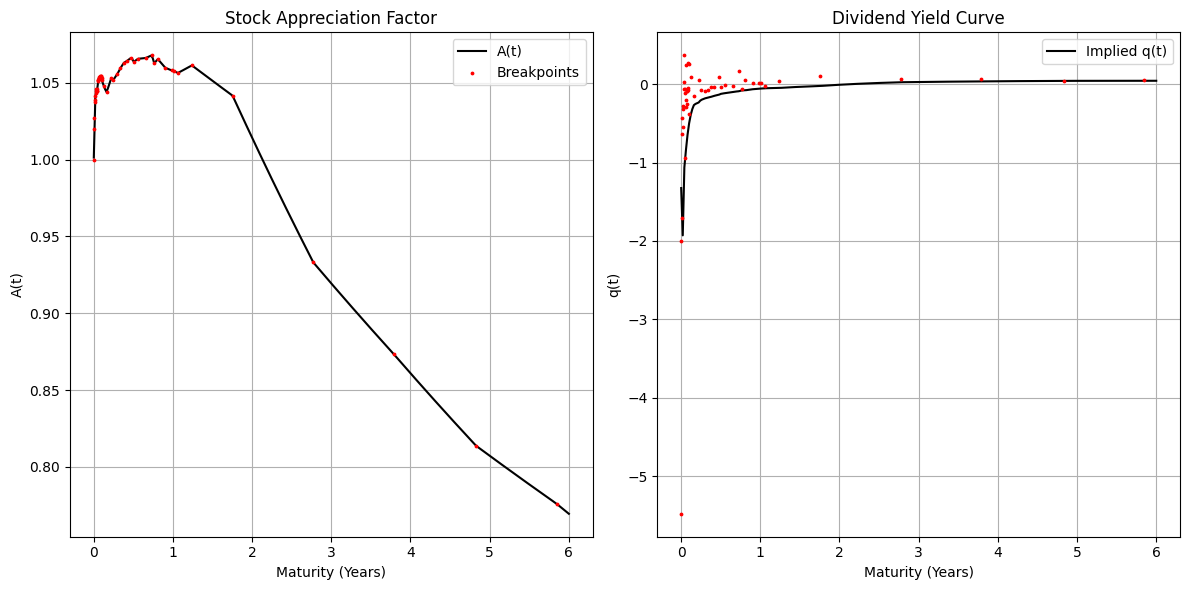

In [ ]:
DivCurve_smooth_2 = imp_div.get_dividend_curve(options_data, 'smooth', q_imp_ind = 'q_imp_iv')
DivCurve_smooth_2.plot()

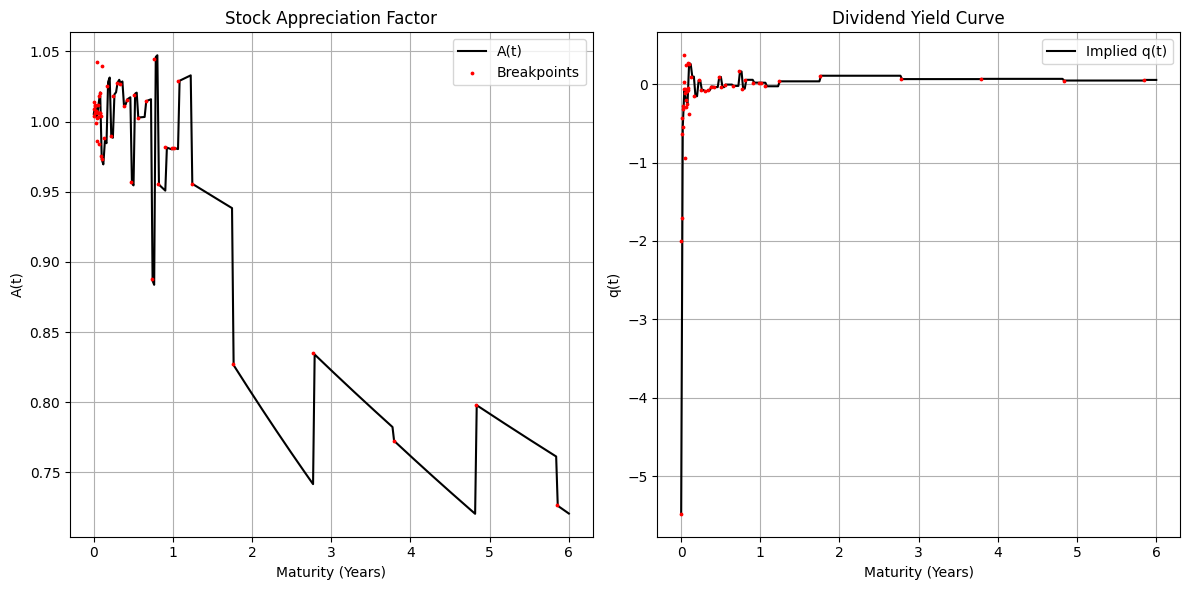

In [ ]:
DivCurve_step_2 = imp_div.get_dividend_curve(options_data, 'step', q_imp_ind = 'q_imp_iv')
DivCurve_step_2.plot()

for now we decide to move on with the Parity estimate with smooth settings

In [ ]:
options_data['q'] = options_data['T'].apply(
    lambda x: DivCurve_step.q_at(x)
)

# Calculating the IV

once we have obtained all the remaining parameters of our model, we are ready to calculate the IV at the bid, ask and also mid levels.

In [ ]:
from BS_utils import bs_functions as BS
import numpy as np

def get_option_askbidIV(options_data, S_0):

    midIV, askIV, bidIV = [], [], []

    count = 0
    print('Calculating IV for options... Total Runs: '+str(len(options_data.index)))

    for index in options_data.index:
        
        option = options_data.loc[index]

        K = option['strike']; T = option['T']
        r = option['r']; delta = option['q']
        askPrice = option['ask']; bidPrice = option['bid']
        midPrice = (askPrice+bidPrice)/2
        optionType = option['type']

        if askPrice > 0.1:
            askIV.append(BS.get_BS_IV(S_0, K, r, T, delta, askPrice, optionType))
        else:
            askIV.append(np.nan)
        
        if bidPrice > 0.1:
            bidIV.append(BS.get_BS_IV(S_0, K, r, T, delta, bidPrice, optionType))
        else:
            bidIV.append(np.nan)

        if midPrice > 0.1:
            midIV.append(BS.get_BS_IV(S_0, K, r, T, delta, midPrice, optionType))
        else:
            midIV.append(np.nan)

        count += 1

        if count % 1000 == 0:
            print('Run: '+str(count)+'/'+str(len(options_data.index))+', Maturity: '+str(T)+'...')

    options_data['midIV'] = midIV; options_data['askIV'] = askIV; options_data['bidIV'] = bidIV

    return options_data

In [ ]:
options_data = get_option_askbidIV(options_data,S_0)
options_data.loc[ options_data['askIV'] == 0.2 ,'askIV' ] = np.nan
options_data.loc[ options_data['bidIV'] == 0.2 ,'bidIV' ] = np.nan
options_data.loc[ options_data['midIV'] == 0.2 ,'midIV' ] = np.nan

Calculating IV for options... Total Runs: 14705
Run: 1000/14705, Maturity: 0.00798068822500162...
Run: 2000/14705, Maturity: 0.02444754066489534...
Run: 3000/14705, Maturity: 0.04091439310478907...
Run: 4000/14705, Maturity: 0.051169723284297836...
Run: 5000/14705, Maturity: 0.07847028708444041...
Run: 6000/14705, Maturity: 0.10577085088458299...
Run: 7000/14705, Maturity: 0.16340483442421103...
Run: 8000/14705, Maturity: 0.221038817963839...
Run: 9000/14705, Maturity: 0.2987508910634437...
Run: 10000/14705, Maturity: 0.3790632493033504...
Run: 11000/14705, Maturity: 0.47685341196293174...
Run: 12000/14705, Maturity: 0.6575562180027218...
Run: 13000/14705, Maturity: 0.9044142742963299...
Run: 14000/14705, Maturity: 1.753615017389238...


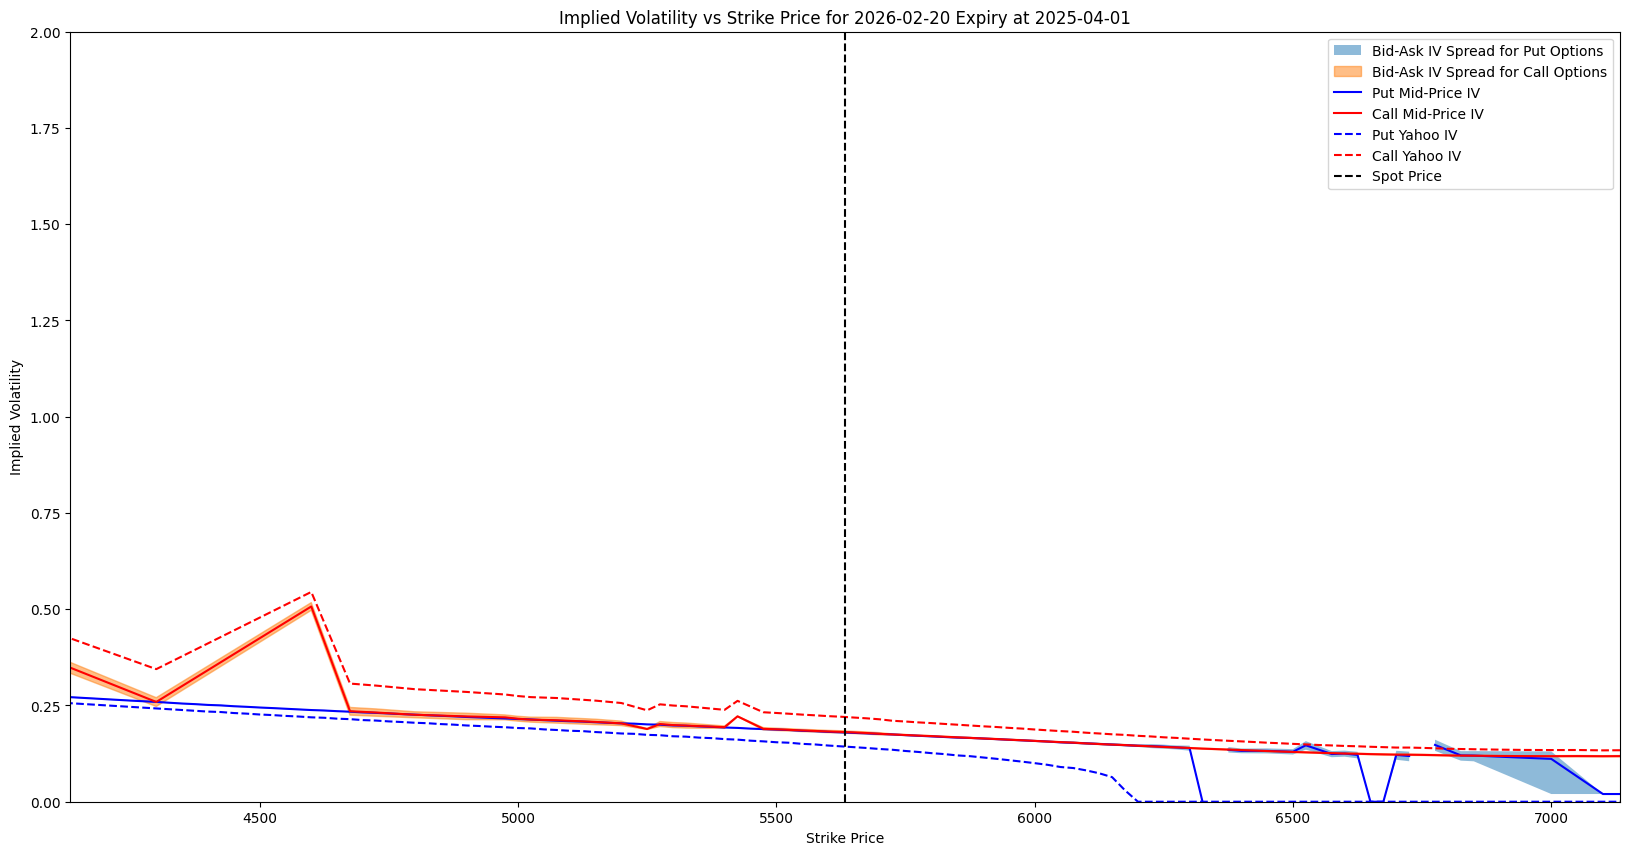

In [ ]:
plt.figure(figsize=(20, 10))


maturities = options_data['T'].unique()
maturity = maturities[-10]

maturityData = options_data[ options_data['T'] == maturity ]

putData = maturityData[ maturityData['type'] == 'P' ]
callData = maturityData[ maturityData['type'] == 'C' ]


plt.fill_between(putData['strike'], putData['askIV'], putData['bidIV'] , alpha=0.5, label='Bid-Ask IV Spread for Put Options')
plt.fill_between(callData['strike'], callData['askIV'], callData['bidIV'], alpha=0.5, label='Bid-Ask IV Spread for Call Options', color='tab:orange')

plt.plot(putData['strike'], putData['midIV'], label='Put Mid-Price IV', color='b')
plt.plot(callData['strike'], callData['midIV'], label='Call Mid-Price IV', color='r')

plt.plot(putData['strike'], putData['impliedVolatility'], label='Put Yahoo IV', color='b', linestyle='--')
plt.plot(callData['strike'], callData['impliedVolatility'], label='Call Yahoo IV', color='r', linestyle='--')


plt.axvline(x=S_0, color='black', linestyle='--', label='Spot Price')

plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title( 'Implied Volatility vs Strike Price for '+ putData['expirationDate'].iloc[0].strftime('%Y-%m-%d') + ' Expiry at ' + dt(2025,4,1).strftime('%Y-%m-%d') )

plt.xlim(S_0-1500,S_0+1500)
plt.ylim(0,2)

plt.legend()
plt.show()

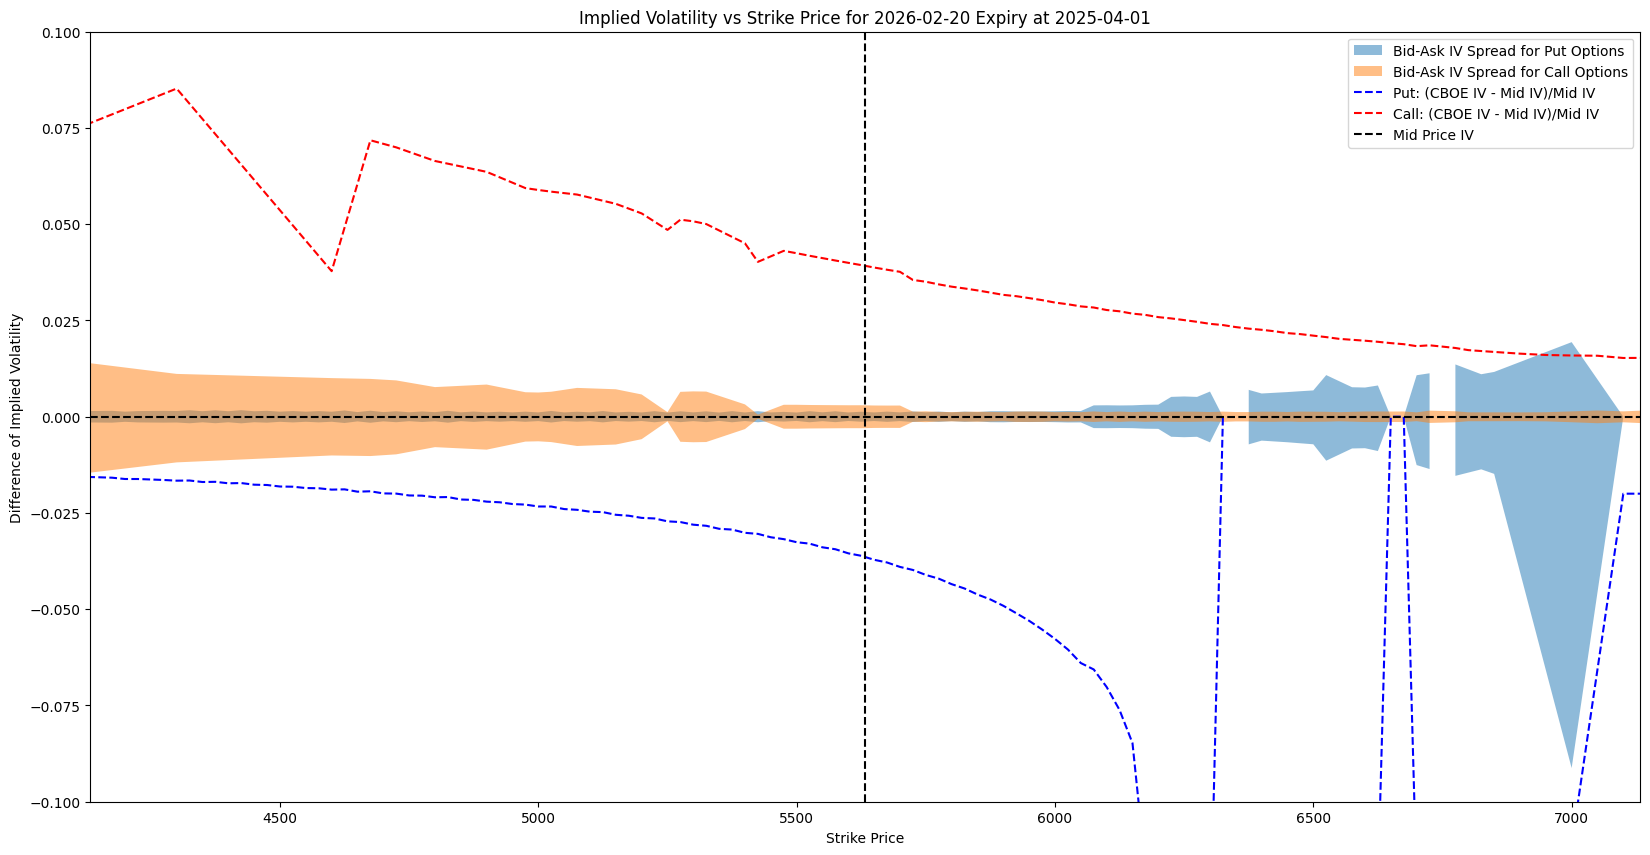

In [ ]:
plt.figure(figsize=(20, 10))

plt.fill_between(putData['strike'], (putData['askIV']-putData['midIV']), (putData['bidIV']-putData['midIV']) , alpha=0.5, label='Bid-Ask IV Spread for Put Options')
plt.fill_between(callData['strike'], (callData['askIV']-callData['midIV']), (callData['bidIV']-callData['midIV']), alpha=0.5, label='Bid-Ask IV Spread for Call Options')

plt.plot(putData['strike'], (putData['impliedVolatility']-putData['midIV']), label='Put: (CBOE IV - Mid IV)/Mid IV', color='b', linestyle='--')
plt.plot(callData['strike'], (callData['impliedVolatility']-callData['midIV']), label='Call: (CBOE IV - Mid IV)/Mid IV', color='r', linestyle='--')


plt.axvline(x=S_0, color='black', linestyle='--', label='Mid Price IV')
plt.axhline(y=0, color='black', linestyle='--')

plt.xlim(S_0-1500,S_0+1500)
plt.ylim(-0.1,0.1)

plt.xlabel('Strike Price')
plt.ylabel('Difference of Implied Volatility')
plt.title( 'Implied Volatility vs Strike Price for '+ putData['expirationDate'].iloc[0].strftime('%Y-%m-%d') + ' Expiry at ' + dt(2025,4,1).strftime('%Y-%m-%d') )

plt.legend()

In [ ]:
b = get_option_askbidIV(options_data,S_0)

Calculating IV for options... Total Runs: 14705


c:\Users\Emre\Documents\GitHub\lineqConsGPR\BS_utils\bs_functions.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  while (abs((price - marketPrice) / v) > tol):
c:\Users\Emre\Documents\GitHub\lineqConsGPR\BS_utils\bs_functions.py:69: RuntimeWarning: divide by zero encountered in scalar divide
  x0 = x0 - (price - marketPrice) / v
c:\Users\Emre\Documents\GitHub\lineqConsGPR\BS_utils\bs_functions.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return (np.log(S/K)+(r - delta + 0.5*iv**2)*T) / (iv*np.sqrt(T))
c:\Users\Emre\Documents\GitHub\lineqConsGPR\BS_utils\bs_functions.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return (np.log(S/K)+(r -delta - 0.5*iv**2)*T) / (iv*np.sqrt(T))


KeyboardInterrupt: 